In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
df=load_wine()
df1=pd.DataFrame(df,columns=df.feature_names)
df1['Target']=df.target

In [35]:
df1['Target'].unique()

array([0, 1, 2])

In [36]:
x=df.data
y=df.target

In [37]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [38]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x_scaled)

In [39]:
df_pca=pd.DataFrame(x_pca,columns=['PC1','PC2','PC3'])

In [40]:
df_pca['Target']=y

In [41]:
df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

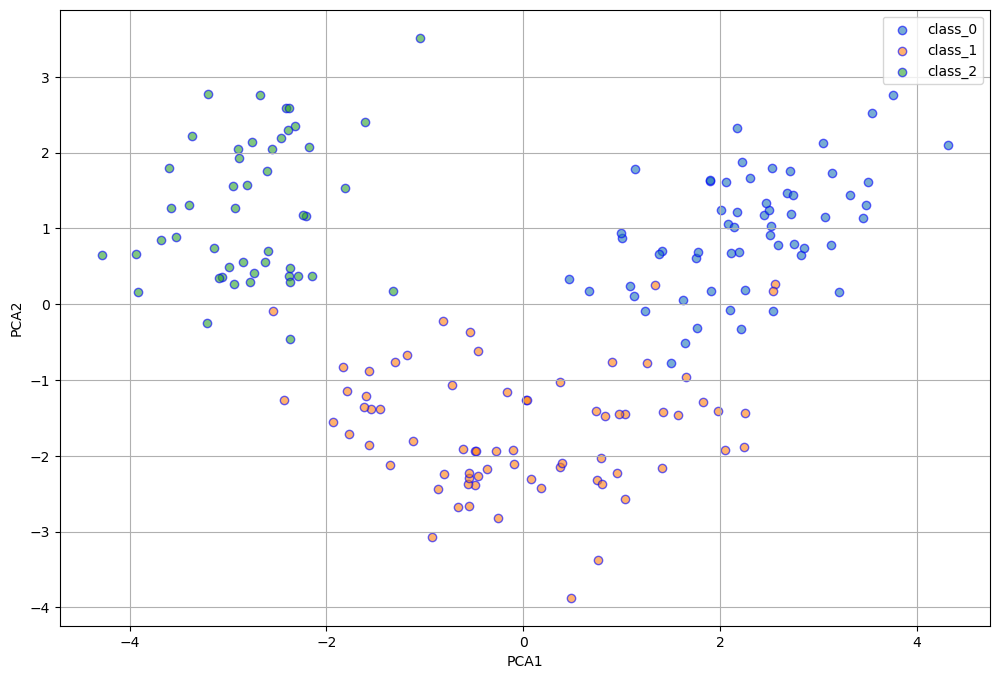

In [42]:
plt.figure(figsize=(12,8))
for label,color in zip([0,1,2],['Red','Green','Blue']):
    plt.scatter(df_pca[df_pca['Target']==label]['PC1'],df_pca[df_pca['Target']==label]['PC2'],label=df.target_names[label],alpha=0.6,edgecolors='b')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()

In [43]:
#Q6
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [44]:
df=load_breast_cancer()

In [45]:
x=df.data
y=df.target

In [46]:
x.shape

(569, 30)

In [47]:
y.shape

(569,)

In [48]:
df1=pd.DataFrame(x,columns=df.feature_names)

In [49]:
df1['target']=y

In [50]:
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [51]:
scale=StandardScaler()
x_scale=scale.fit_transform(x)

In [52]:
n_comp=2
pca=PCA(n_comp)
x_pca=pca.fit_transform(x_scale)

In [53]:
#using elbow method to determine the optimum number of components
inertia=[]
for k in range(1,11):
    km=KMeans(k)
    km.fit(x_scale)
    inertia.append(km.inertia_)

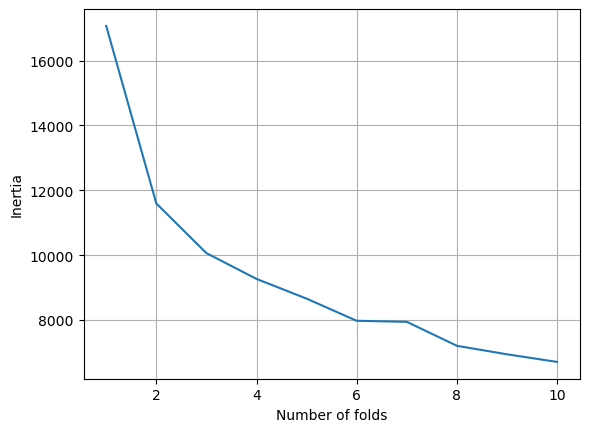

In [91]:
val=range(1,11)
plt.plot(val,inertia)
plt.ylabel("Inertia")
plt.xlabel("Number of folds")
plt.grid()
plt.show()

In [79]:
#effective number of components are 10
n_components=10
pca=PCA(n_components)
x_pca=pca.fit_transform(x_scale)
pca.n_components_
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [81]:
x_pca.shape

(569, 10)

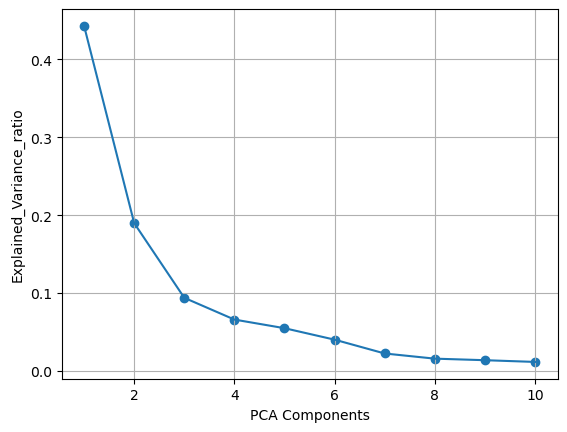

In [89]:
PCA_val=np.arange(pca.n_components_)+1
PCA_val
plt.plot(PCA_val,pca.explained_variance_ratio_) 
plt.scatter(PCA_val,pca.explained_variance_ratio_)
plt.ylabel("Explained_Variance_ratio")
plt.xlabel("PCA Components")
plt.grid()